In [126]:
import numpy as np
import scipy
import librosa, librosa.display
print(librosa.__version__)
import matplotlib.pyplot as plt
#render plot option - matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib widget
#select a different color-scheme for the plots
import matplotlib.style as ms
ms.use("seaborn-v0_8")  
import IPython.display as Ipd

0.10.1


(423424,)
9.601


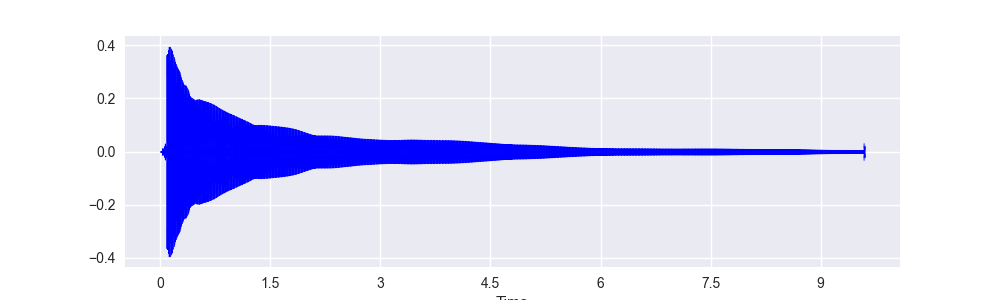

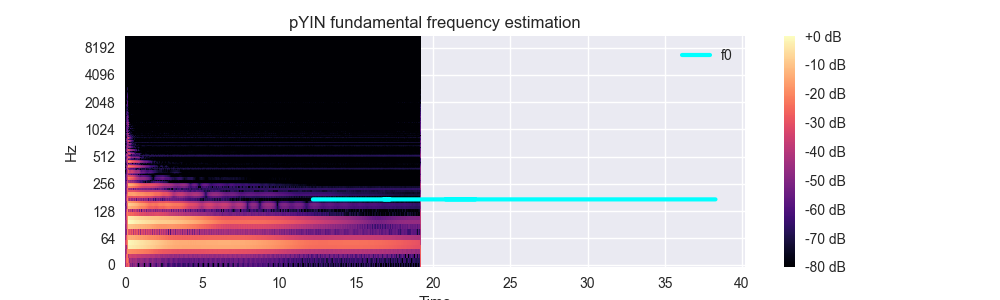

In [183]:
sample_name = 'E3-static'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-0.wav'
sr = 44100 # sampling rate
static_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(static_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(static_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=static_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(static_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                            frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(static_signal)), ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(static_signal, rate=sr) # play audio

(426496,)
9.671


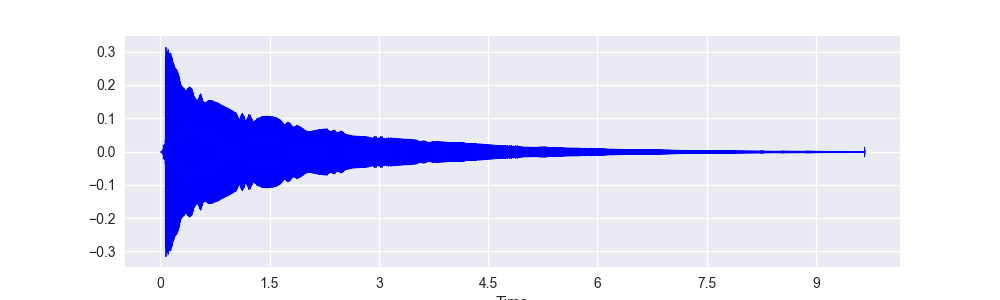

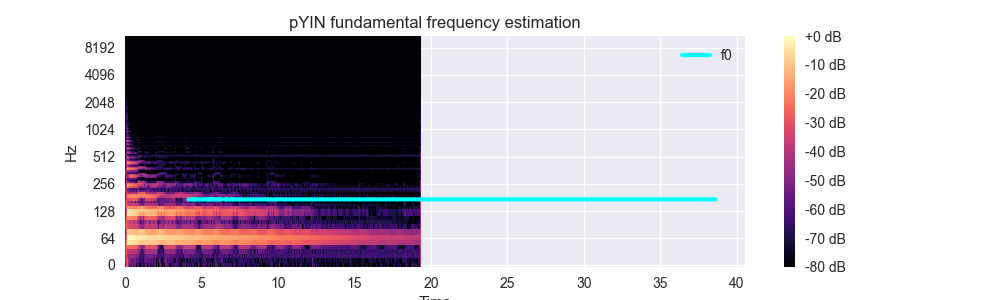

In [184]:
sample_name = 'E7-vertical'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-0.wav'
sr = 44100 # sampling rate
vertical_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(vertical_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(vertical_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=vertical_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(vertical_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                            frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(vertical_signal)), 
                            ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(vertical_signal, rate=sr) # play audio

(422400,)
9.578


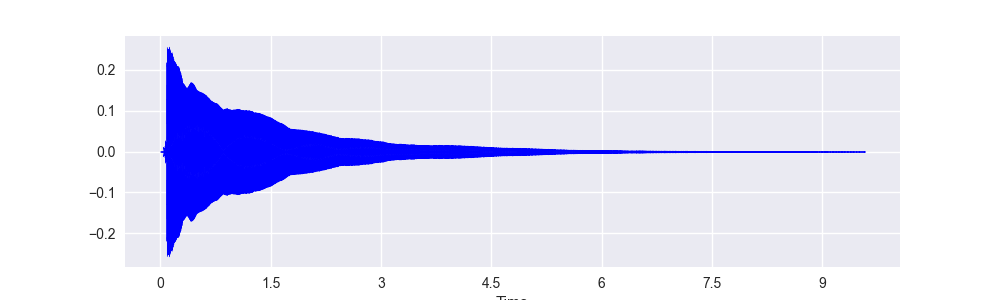

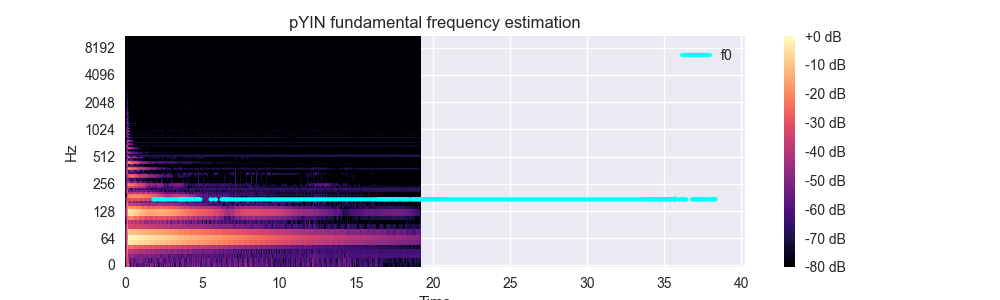

In [185]:
sample_name = 'E7-horizontal'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-2.wav'
sr = 44100 # sampling rate
horizontal_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(horizontal_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(horizontal_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=horizontal_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(horizontal_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                             frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(horizontal_signal)), ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(horizontal_signal, rate=sr) # play audio

(424448,)
9.625


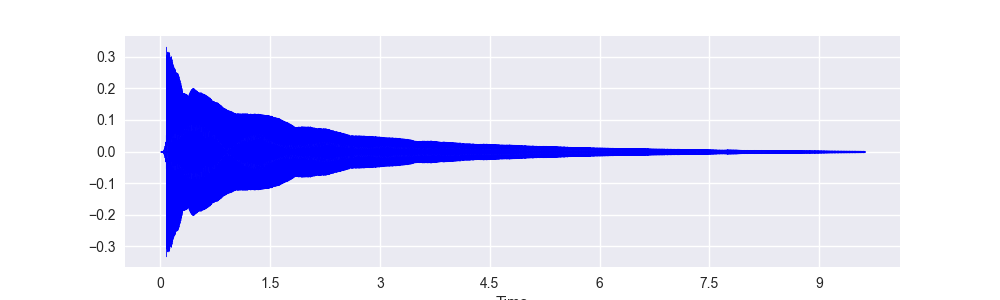

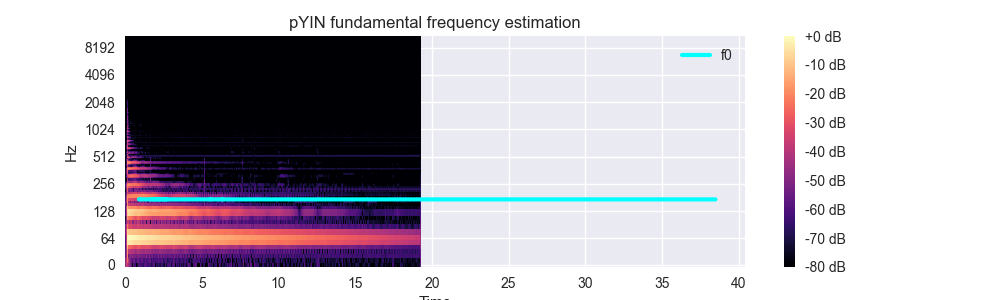

In [186]:
sample_name = 'E7-circular'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-0.wav'
sr = 44100 # sampling rate
circular_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(circular_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(circular_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=circular_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(circular_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                            frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(circular_signal)), ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(circular_signal, rate=sr) # play audio

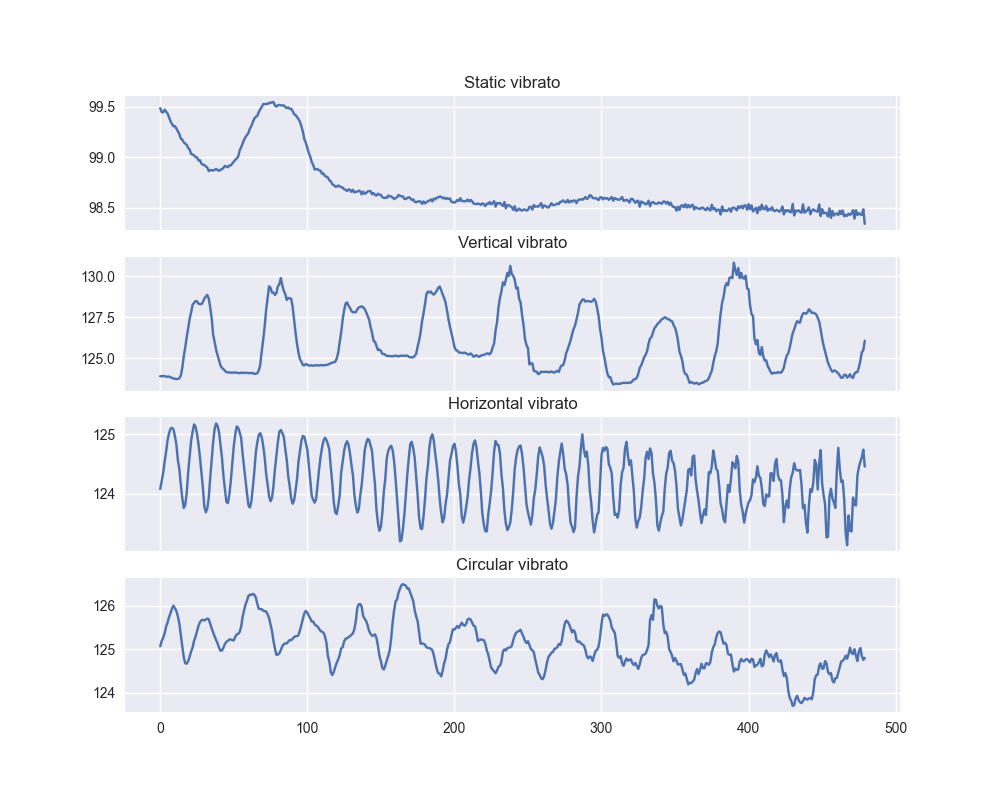

In [189]:
import pandas as pd

frame_length=2048

freq_static = librosa.yin(static_signal, sr=sr, fmin=50, 
                          fmax=880, frame_length=frame_length)
rms_static = librosa.feature.rms(y=static_signal)
rolling_mean = pd.Series(freq).rolling(window=20).mean()
rolling_std = pd.Series(freq).rolling(window=20).std()

freq_vertical = librosa.yin(vertical_signal, sr=sr, fmin=50, 
                            fmax=880, frame_length=frame_length)
freq_horizontal = librosa.yin(horizontal_signal, sr=sr, fmin=50, 
                              fmax=880, frame_length=frame_length)
freq_circular = librosa.yin(circular_signal, sr=sr, fmin=50, 
                            fmax=880, frame_length=frame_length)

min_idx = 20
max_idx = 500
fig, ax = plt.subplots(4, figsize=(10,8), sharex=True)
ax[0].plot(freq_static[min_idx:max_idx])
#ax[0].set_ylim([240, 260])
ax[0].set_title("Static vibrato")
ax[1].plot(freq_vertical[min_idx:max_idx])
#ax[1].set_ylim([240, 260])
ax[1].set_title("Vertical vibrato")
ax[2].plot(freq_horizontal[min_idx:max_idx])
#ax[2].set_ylim([240, 260])
ax[2].set_title("Horizontal vibrato")
ax[3].plot(freq_circular[min_idx:max_idx])
#ax[3].set_ylim([240, 260])
ax[3].set_title("Circular vibrato")
fig.savefig("vibrato-comparison.png")

Set general filer to filter out noise

In [406]:
from scipy.signal import butter, lfilter
from scipy.signal import freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = sr
lowcut = 50 # filtering out background noise
highcut = 20000

Compare spectrograms of different kinds of vibrato

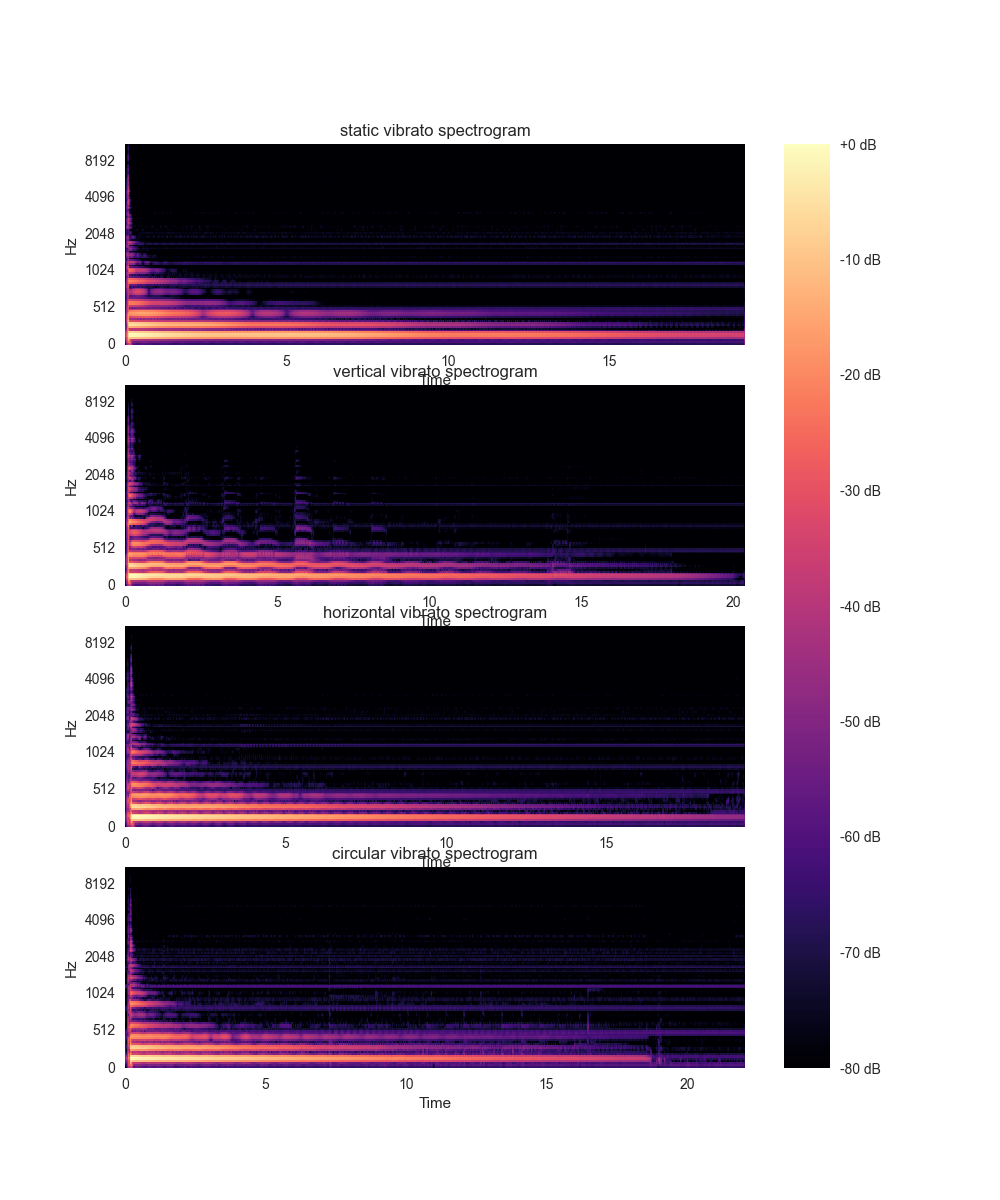

In [484]:
note_name = 'E8'
note_index = 4
sr = 44100 # sampling rate

sample_name = f'{note_name}-static'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-{note_index}.wav'
static_signal, sr = librosa.load(filepath, sr=sr, mono=False)
filtered_static = butter_bandpass_filter(static_signal, lowcut, highcut, sr, order=6) # filtered signal
D_static = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_static)), ref=np.max)
S = librosa.feature.melspectrogram(y=filtered_static, sr=sr, n_mels=128,fmax=8000)
S_static = librosa.power_to_db(S, ref=np.max)

sample_name = f'{note_name}-vertical'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-{note_index}.wav'
vertical_signal, sr = librosa.load(filepath, sr=sr, mono=False)
filtered_vertical = butter_bandpass_filter(vertical_signal, lowcut, highcut, sr, order=6) # filtered signal
D_vertical = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_vertical)), ref=np.max)
S = librosa.feature.melspectrogram(y=filtered_vertical, sr=sr, n_mels=128,fmax=8000)
S_vertical = librosa.power_to_db(S, ref=np.max)

sample_name = f'{note_name}-horizontal'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-{note_index}.wav'
horizontal_signal, sr = librosa.load(filepath, sr=sr, mono=False)
filtered_horizontal = butter_bandpass_filter(horizontal_signal, lowcut, highcut, sr, order=6) # filtered signal
D_horizontal = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_horizontal)), ref=np.max)
S = librosa.feature.melspectrogram(y=filtered_horizontal, sr=sr, n_mels=128,fmax=8000)
S_horizontal = librosa.power_to_db(S, ref=np.max)

sample_name = f'{note_name}-circular'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-{note_index}.wav'
circular_signal, sr = librosa.load(filepath, sr=sr, mono=False)
filtered_ciruclar = butter_bandpass_filter(circular_signal, lowcut, highcut, sr, order=6) # filtered signal
D_circular = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_ciruclar)), ref=np.max)
S = librosa.feature.melspectrogram(y=filtered_ciruclar, sr=sr, n_mels=128,fmax=8000)
S_circular = librosa.power_to_db(S, ref=np.max)


fig, ax = plt.subplots(4, figsize=(10,12))
img = librosa.display.specshow(S_static, x_axis='time', y_axis='mel', ax=ax[0], hop_length=512)
img = librosa.display.specshow(S_vertical, x_axis='time', y_axis='mel', ax=ax[1], hop_length=512)
img = librosa.display.specshow(S_horizontal, x_axis='time', y_axis='mel', ax=ax[2], hop_length=512)
img = librosa.display.specshow(S_circular, x_axis='time', y_axis='mel', ax=ax[3], hop_length=512)
ax[0].set(title='static vibrato spectrogram')
ax[1].set(title='vertical vibrato spectrogram')
ax[2].set(title='horizontal vibrato spectrogram')
ax[3].set(title='circular vibrato spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")
#ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
#ax[0].legend(loc='upper right')
#ax[1].legend(loc='upper right')
#ax[2].legend(loc='upper right')
#ax[3].legend(loc='upper right')

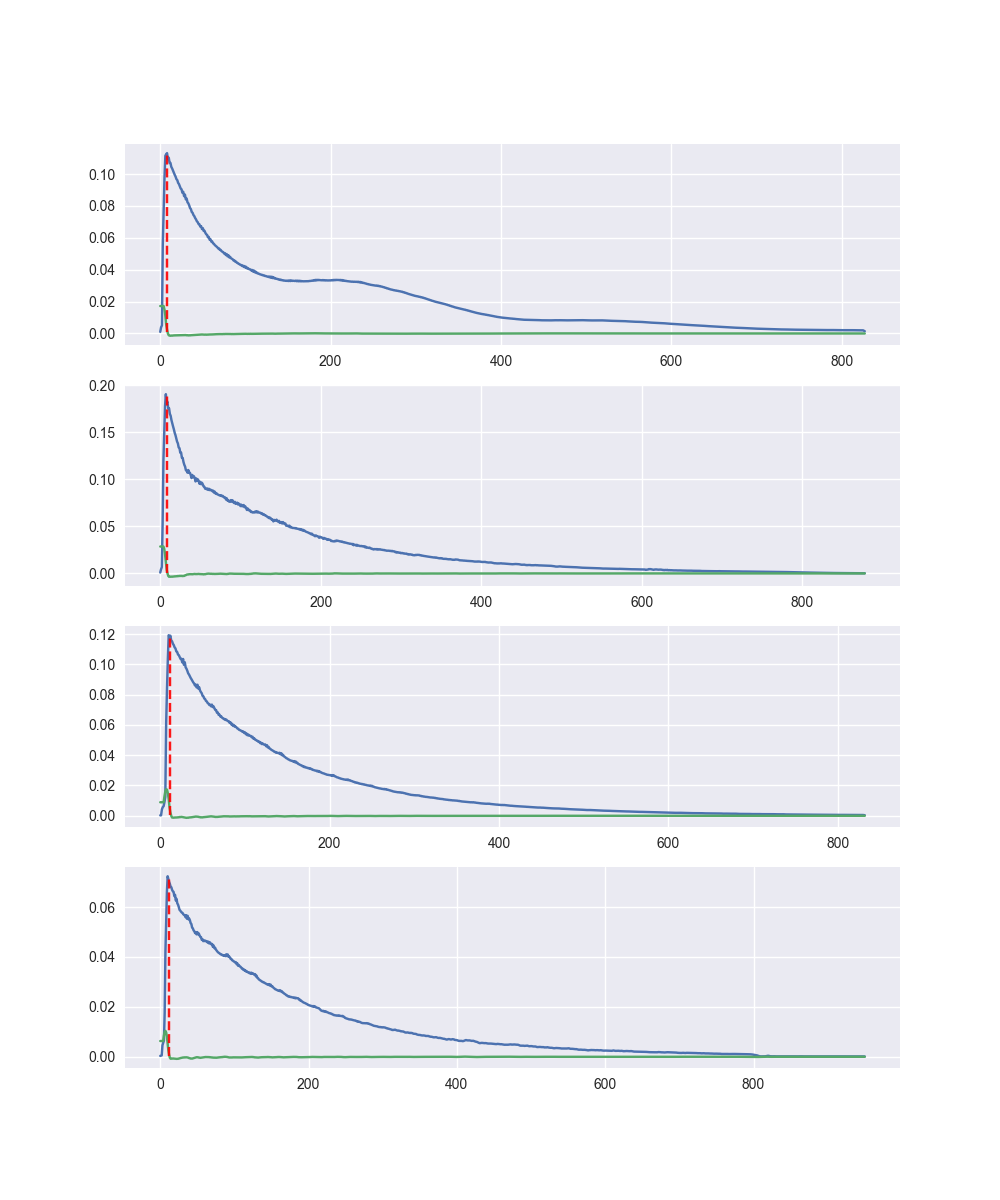

In [485]:
rms_static = librosa.feature.rms(y=filtered_static)
rms_static_delta = librosa.feature.delta(rms_static)
zero_crossings_static = np.where(np.diff(np.sign(rms_static_delta)))[1]

rms_vertical = librosa.feature.rms(y=filtered_vertical)
rms_vertical_delta = librosa.feature.delta(rms_vertical)
zero_crossings_vertical = np.where(np.diff(np.sign(rms_vertical_delta)))[1]

rms_horizontal = librosa.feature.rms(y=filtered_horizontal)
rms_horizontal_delta = librosa.feature.delta(rms_horizontal)
zero_crossings_horizontal = np.where(np.diff(np.sign(rms_horizontal_delta)))[1]

rms_circular = librosa.feature.rms(y=filtered_ciruclar)
rms_circular_delta = librosa.feature.delta(rms_circular)
zero_crossings_circular = np.where(np.diff(np.sign(rms_circular_delta)))[1]

min_idx = 0
max_idx = 10000
fig, ax = plt.subplots(4, figsize=(10,12))
ax[0].plot(rms_static[0, min_idx:max_idx])
ax[0].plot(rms_static_delta[0, min_idx:max_idx])
ax[0].vlines(zero_crossings_static[0], rms_static.min(), rms_static.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[1].plot(rms_vertical[0, min_idx:max_idx])
ax[1].plot(rms_vertical_delta[0, min_idx:max_idx])
ax[1].vlines(zero_crossings_vertical[0], rms_vertical.min(), rms_vertical.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[2].plot(rms_horizontal[0, min_idx:max_idx])
ax[2].plot(rms_horizontal_delta[0, min_idx:max_idx])
ax[2].vlines(zero_crossings_horizontal[0], rms_horizontal.min(), rms_horizontal.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[3].plot(rms_circular[0, min_idx:max_idx])
ax[3].plot(rms_circular_delta[0, min_idx:max_idx])
ax[3].vlines(zero_crossings_circular[0], rms_circular.min(), rms_circular.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')

Cut single soundwaves based on the attack onset

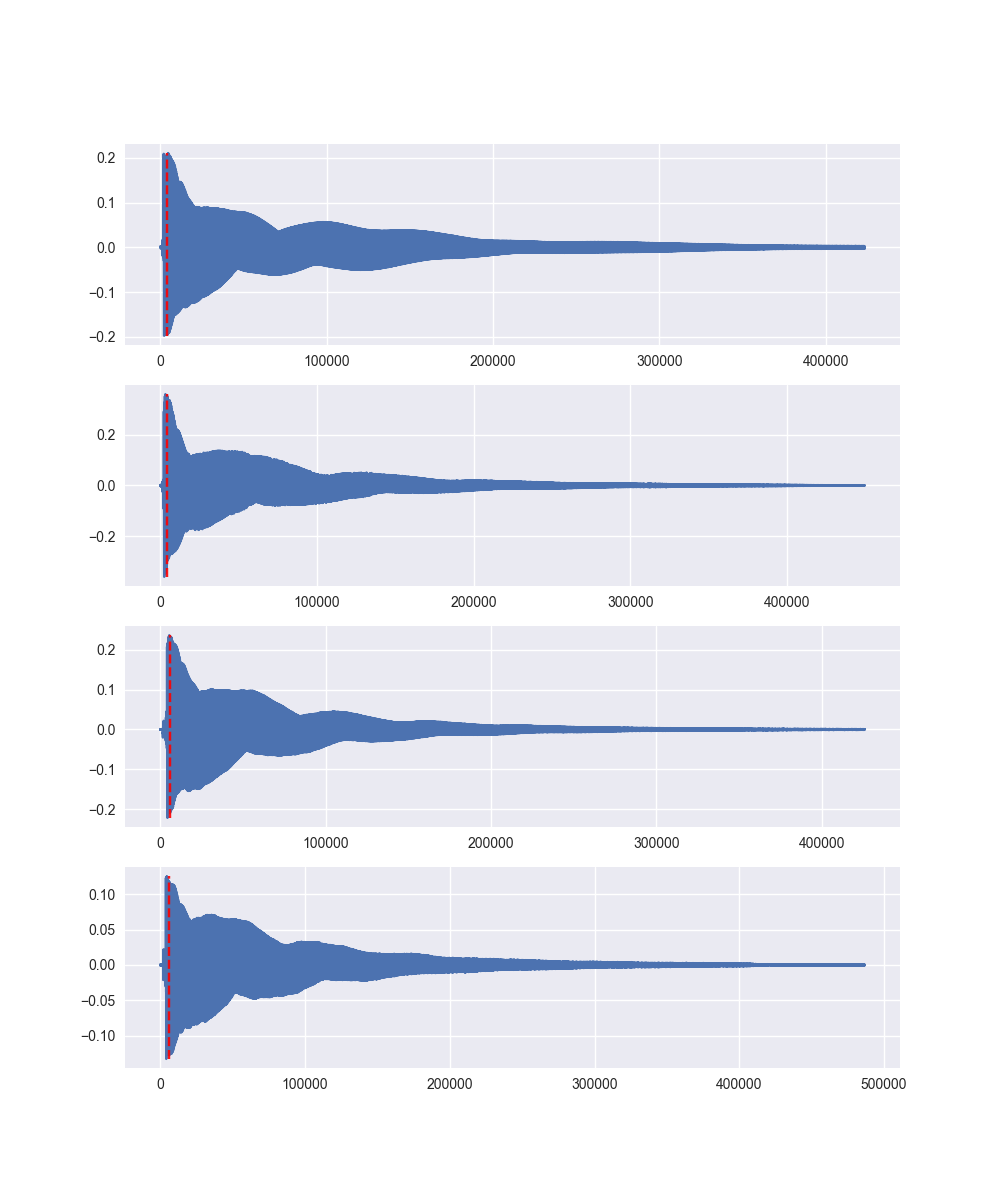

In [486]:
cut_sample_static = librosa.frames_to_samples(zero_crossings_static)[0]
static_signal_noHead = static_signal[cut_sample_static:]

cut_sample_vertical = librosa.frames_to_samples(zero_crossings_vertical)[0]
vertical_signal_noHead = vertical_signal[cut_sample_vertical:]

cut_sample_horizontal = librosa.frames_to_samples(zero_crossings_horizontal)[0]
horizontal_signal_noHead = horizontal_signal[cut_sample_horizontal:]

cut_sample_circular = librosa.frames_to_samples(zero_crossings_circular)[0]
circular_signal_noHead = circular_signal[cut_sample_circular:]

fig, ax = plt.subplots(4, figsize=(10,12))
ax[0].plot(static_signal)
ax[0].vlines(cut_sample_static, static_signal.min(), static_signal.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[1].plot(vertical_signal)
ax[1].vlines(cut_sample_vertical, vertical_signal.min(), vertical_signal.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[2].plot(horizontal_signal)
ax[2].vlines(cut_sample_horizontal, horizontal_signal.min(), horizontal_signal.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[3].plot(circular_signal)
ax[3].vlines(cut_sample_circular, circular_signal.min(), circular_signal.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')

Extract central frequency using the yin algorithm

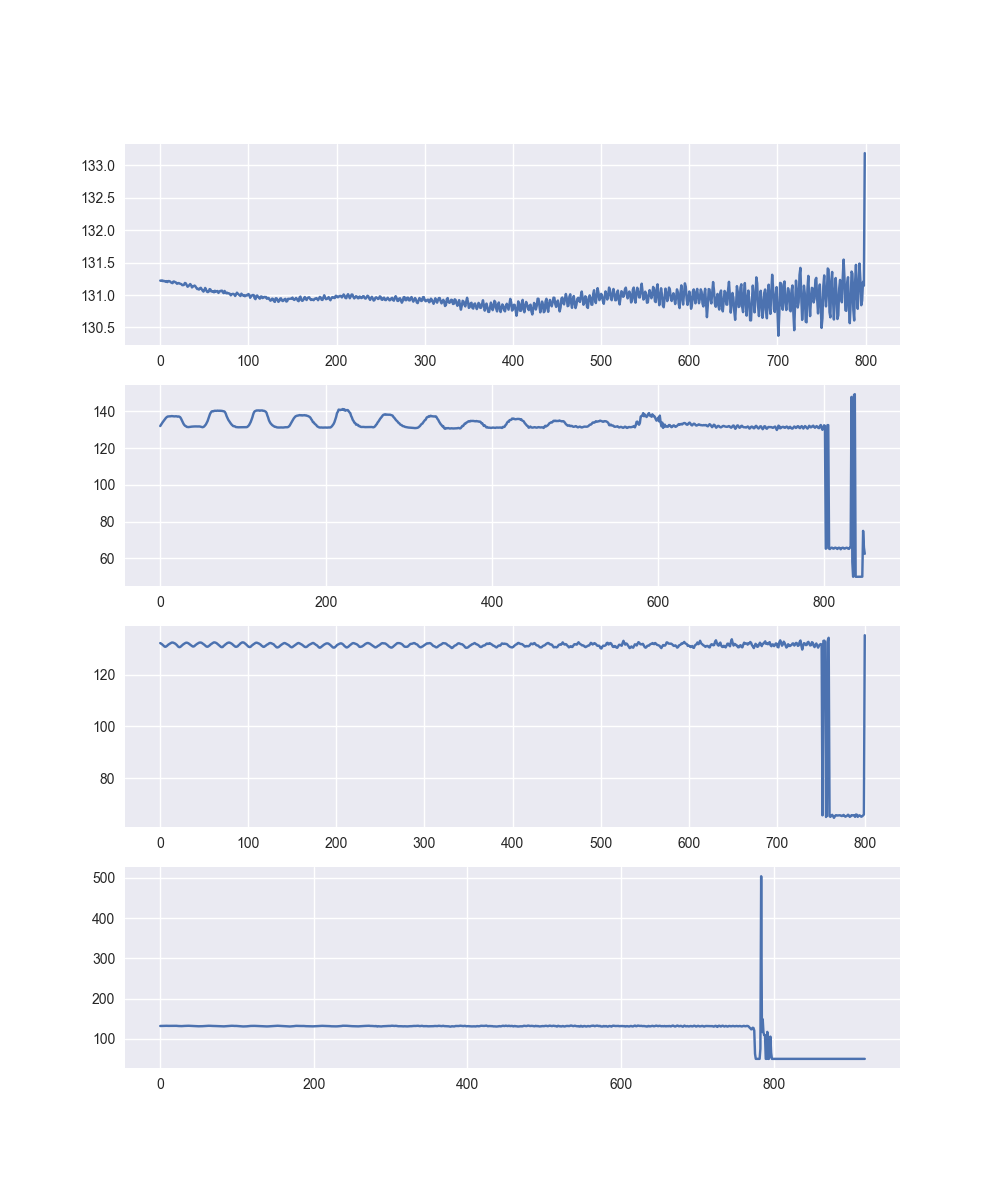

In [487]:
cent_static = librosa.yin(y=static_signal_noHead, sr=sr, fmin=50, fmax=880)
cent_vertical = librosa.yin(y=vertical_signal_noHead, sr=sr, fmin=50, fmax=880)
cent_horizontal = librosa.yin(y=horizontal_signal_noHead, sr=sr, fmin=50, fmax=880)
cent_circular = librosa.yin(y=circular_signal_noHead, sr=sr, fmin=50, fmax=880)

min_idx = 20
max_idx = 10000
fig, ax = plt.subplots(4, figsize=(10,12))
ax[0].plot(cent_static[min_idx:max_idx])
ax[1].plot(cent_vertical[min_idx:max_idx])
ax[2].plot(cent_horizontal[min_idx:max_idx])
ax[3].plot(cent_circular[min_idx:max_idx])

In [488]:
k = 5 # average of the k frequencies with max amplitudes
mean_f0_static = np.mean(cent_static[np.argpartition(rms_static[0], len(rms_static[0]) - k)[-k:]])
mean_f0_vertical = np.mean(cent_vertical[np.argpartition(rms_vertical[0], len(rms_vertical[0]) - k)[-k:]])
mean_f0_horizontal = np.mean(cent_horizontal[np.argpartition(rms_horizontal[0], len(rms_horizontal[0]) - k)[-k:]])
mean_f0_circular = np.mean(cent_circular[np.argpartition(rms_circular[0], len(rms_circular[0]) - k)[-k:]])

Calculate the derivative of the signal and cut when the derivative goes over a threshold

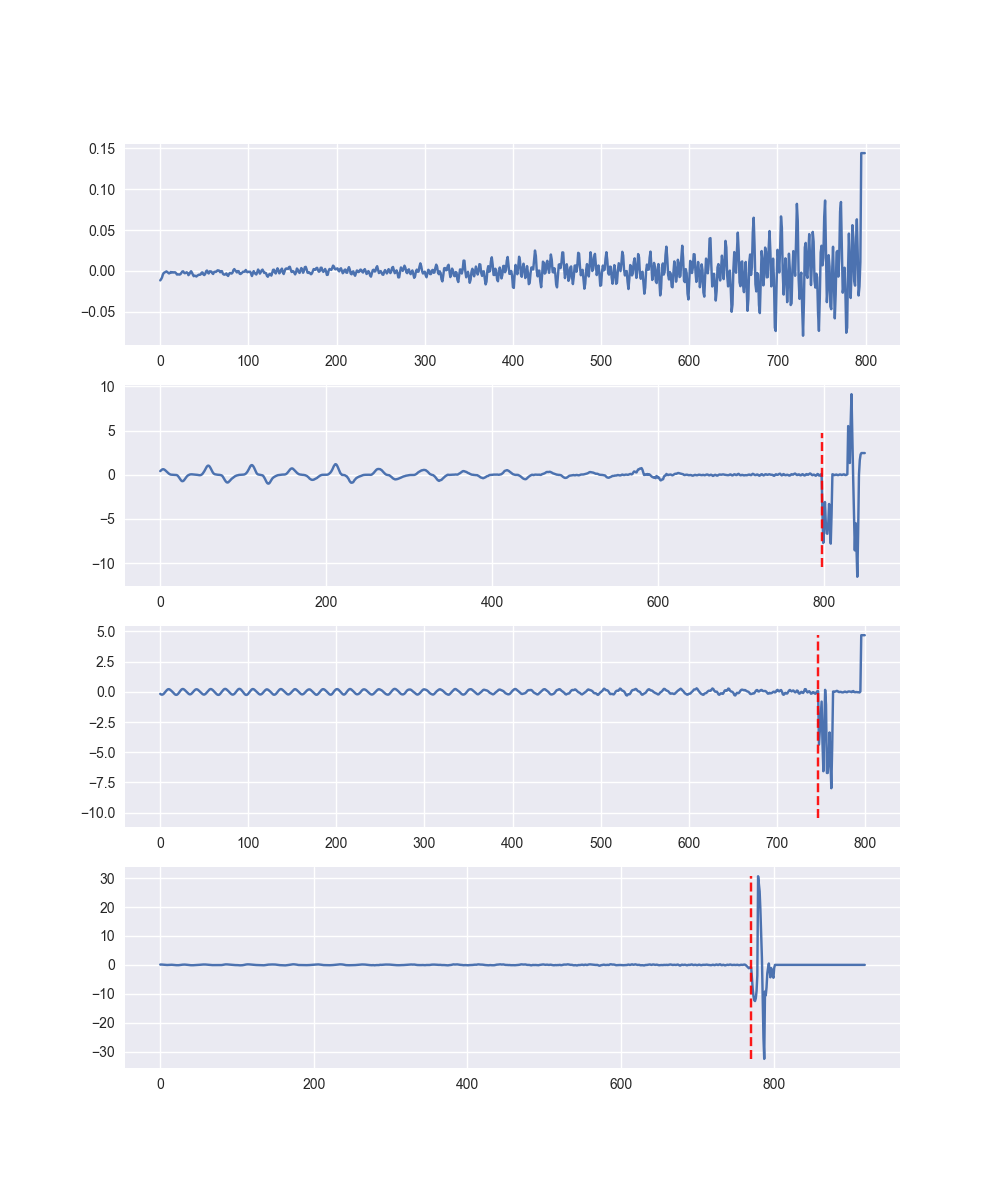

In [489]:
cut_thresh = 3

cent_static_delta = librosa.feature.delta(cent_static)
try:
    cut_idx_static = np.where(np.abs(cent_static_delta[min_idx:max_idx]) > cut_thresh)[0][0] -1
except:
    cut_idx_static = None

cent_vertical_delta = librosa.feature.delta(cent_vertical)
try:
    cut_idx_vertical = np.where(np.abs(cent_vertical_delta[min_idx:max_idx]) > cut_thresh)[0][0] -1
except:
    cut_idx_vertical = None

cent_horizontal_delta = librosa.feature.delta(cent_horizontal)
try:
    cut_idx_horizontal = np.where(np.abs(cent_horizontal_delta[min_idx:max_idx]) > cut_thresh)[0][0] -1
except:
    cut_idx_horizontal = None

cent_circular_delta = librosa.feature.delta(cent_circular)
try:
    cut_idx_circular = np.where(np.abs(cent_circular_delta[min_idx:max_idx]) > cut_thresh)[0][0] -1
except:
    cut_idx_circular = None

min_idx = 20
max_idx = 1000
fig, ax = plt.subplots(4, figsize=(10,12))
ax[0].plot(cent_static_delta[min_idx:max_idx])
if cut_idx_static:
    ax[0].vlines(cut_idx_static, cent_static_delta.min(), cent_static_delta.max(), 
               color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[1].plot(cent_vertical_delta[min_idx:max_idx])
if cut_idx_vertical:
    ax[1].vlines(cut_idx_vertical, cent_horizontal_delta.min(), cent_horizontal_delta.max(), 
               color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[2].plot(cent_horizontal_delta[min_idx:max_idx])
if cut_idx_horizontal:
    ax[2].vlines(cut_idx_horizontal, cent_horizontal_delta.min(), cent_horizontal_delta.max(), 
               color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[3].plot(cent_circular_delta[min_idx:max_idx])
if cut_idx_circular:
    ax[3].vlines(cut_idx_circular, cent_circular_delta.min(), cent_circular_delta.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')


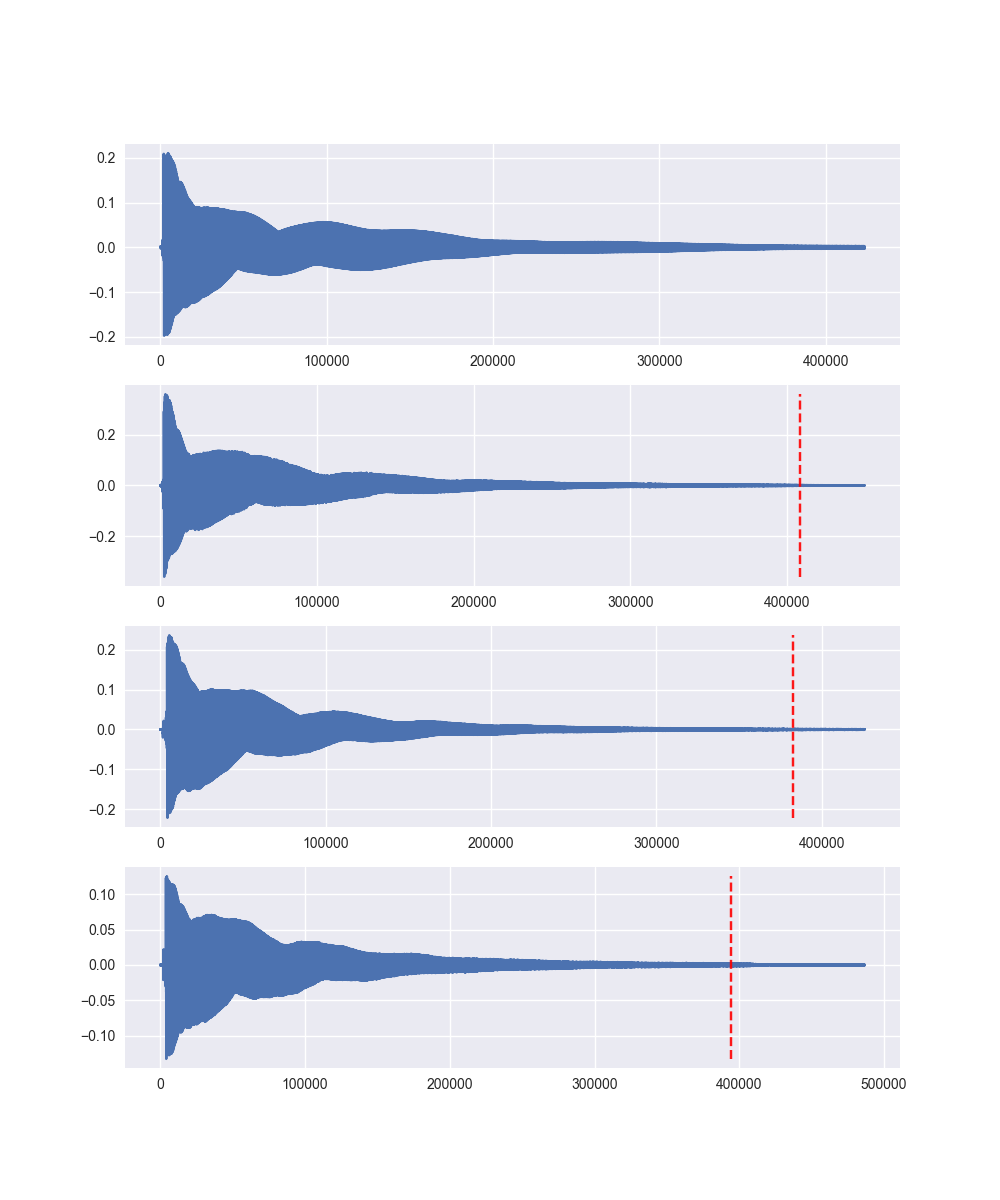

In [490]:
fig, ax = plt.subplots(4, figsize=(10,12))
ax[0].plot(static_signal)
ax[1].plot(vertical_signal)
ax[2].plot(horizontal_signal)
ax[3].plot(circular_signal)

if cut_idx_static:
    cut_sample_static = librosa.frames_to_samples(cut_idx_static)
    static_signal_noTail = static_signal[:cut_sample_static]
    ax[0].vlines(cut_sample_static, static_signal.min(), static_signal.max(), 
           color='r', alpha=0.9, linestyle='--', label='Onsets')

if cut_idx_vertical:
    cut_sample_vertical = librosa.frames_to_samples(cut_idx_vertical)
    vertical_signal_noTail = vertical_signal[:cut_sample_vertical]
    ax[1].vlines(cut_sample_vertical, vertical_signal.min(), vertical_signal.max(), 
               color='r', alpha=0.9, linestyle='--', label='Onsets')

if cut_idx_horizontal:
    cut_sample_horizontal = librosa.frames_to_samples(cut_idx_horizontal)
    horizontal_signal_noTail = horizontal_signal[:cut_sample_horizontal]
    ax[2].vlines(cut_sample_horizontal, horizontal_signal.min(), horizontal_signal.max(), 
               color='r', alpha=0.9, linestyle='--', label='Onsets')

if cut_idx_circular:
    cut_sample_circular = librosa.frames_to_samples(cut_idx_circular)
    circular_signal_noTail = circular_signal[:cut_sample_circular]
    ax[3].vlines(cut_sample_circular, circular_signal.min(), circular_signal.max(), 
               color='r', alpha=0.9, linestyle='--', label='Onsets')

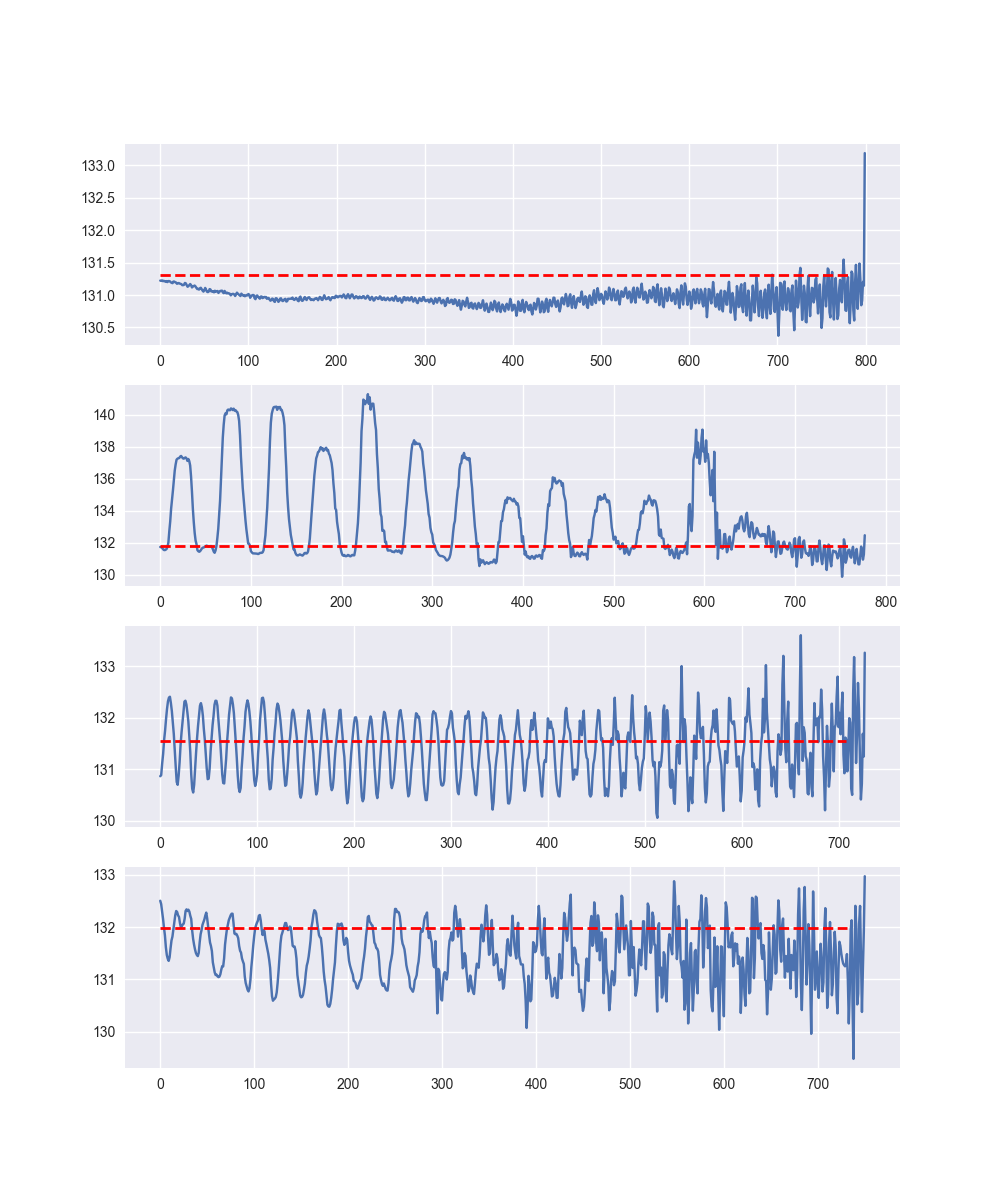

In [491]:
min_idx = 20
if cut_idx_static:
    cent_static = librosa.yin(y=static_signal_noTail, sr=sr, fmin=50, fmax=880)[min_idx:]
else:
    cent_static = cent_static[min_idx:]

if cut_idx_vertical:
    cent_vertical = librosa.yin(y=vertical_signal_noTail, sr=sr, fmin=50, fmax=880)[min_idx:]
else:
    cent_vertical = cent_vertical[min_idx:]

if cut_idx_horizontal:
    cent_horizontal = librosa.yin(y=horizontal_signal_noTail, sr=sr, fmin=50, fmax=880)[min_idx:]
else:
    cent_horizontal = cent_horizontal[min_idx:]

if cut_idx_circular:
    cent_circular = librosa.yin(y=circular_signal_noTail, sr=sr, fmin=50, fmax=880)[min_idx:]
else:
    cent_circular = cent_circular[min_idx:]

fig, ax = plt.subplots(4, figsize=(10,12))
ax[0].plot(cent_static)
ax[0].hlines(y=mean_f0_static, xmin=0, xmax=cent_static[min_idx:].shape[0], 
             linewidth=2, color='r', linestyle='--')
ax[1].plot(cent_vertical)
ax[1].hlines(y=mean_f0_vertical, xmin=0, xmax=cent_vertical[min_idx:].shape[0], 
             linewidth=2, color='r', linestyle='--')
ax[2].plot(cent_horizontal)
ax[2].hlines(y=mean_f0_horizontal, xmin=0, xmax=cent_horizontal[min_idx:].shape[0], 
             linewidth=2, color='r', linestyle='--')
ax[3].plot(cent_circular)
ax[3].hlines(y=mean_f0_circular, xmin=0, xmax=cent_circular[min_idx:].shape[0], 
             linewidth=2, color='r', linestyle='--')